### Step 1: Import Liabraries and Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('Water_potability.csv')

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

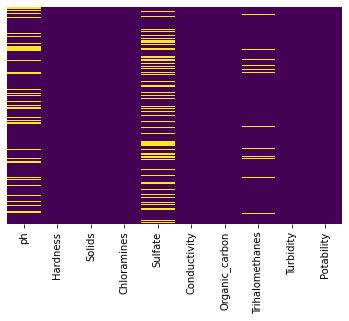

In [6]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

####  We have null values in ph, sulfate and Trihalomethanes columns so it required null value treatment so we will fill them with mean values

In [7]:
data['ph'].fillna(data['ph'].mean(), inplace = True)
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace = True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace = True)

In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Step 2: Exploratory Data Analysis

In [9]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

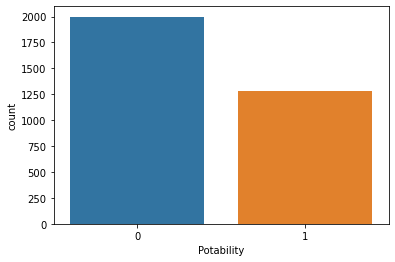

In [10]:
sns.countplot(data['Potability'])

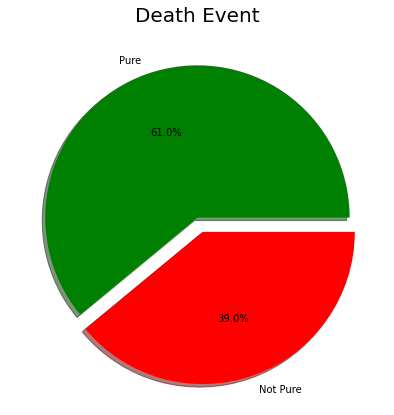

In [11]:
plt.figure(figsize=(7,7))
plt.pie(data['Potability'].value_counts(),labels=['Pure','Not Pure'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['green','red'])
plt.title('Death Event',fontsize=20)
plt.show()

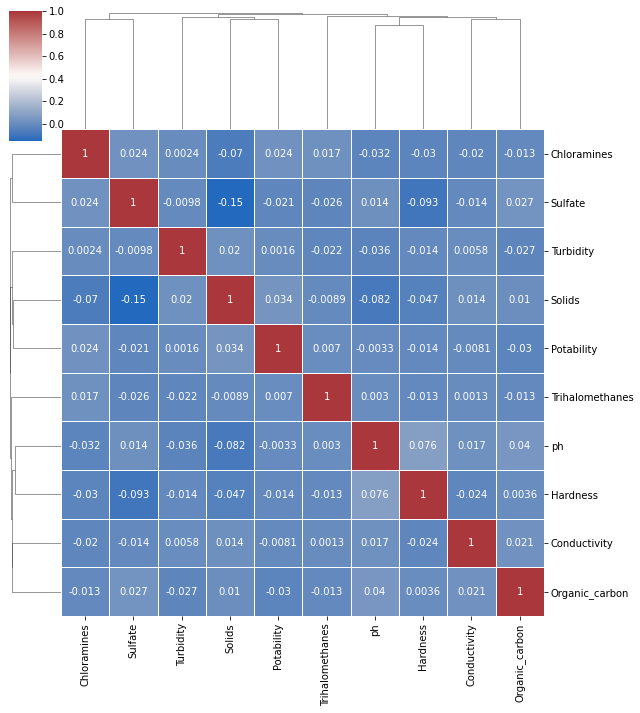

In [12]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

In [13]:
plt.rcParams['figure.figsize'] = (10,4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Solids'>

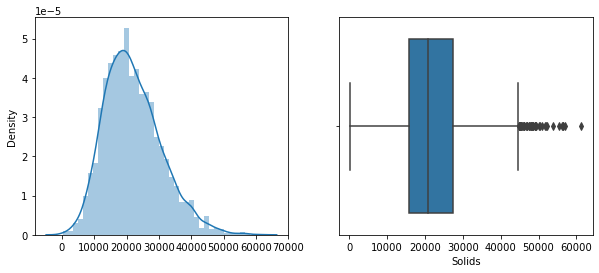

In [14]:
#Solids Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Solids'], kde = True, ax = axes[0])
sns.boxplot(x = data['Solids'], ax = axes[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes'>

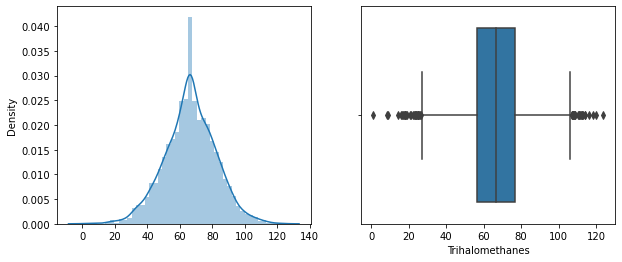

In [15]:
# Trihalomethanes Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Trihalomethanes'], kde = True, ax = axes[0])
sns.boxplot(x = data['Trihalomethanes'], ax = axes[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Organic_carbon'>

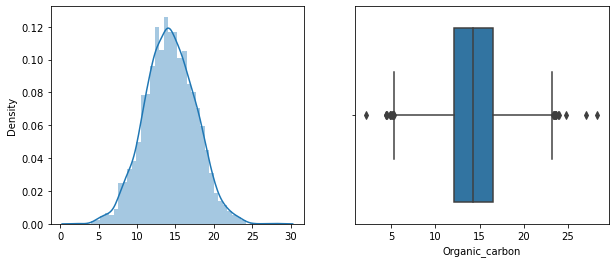

In [16]:
# Organic_carbon Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Organic_carbon'], kde = True, ax = axes[0])
sns.boxplot(x = data['Organic_carbon'], ax = axes[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chloramines'>

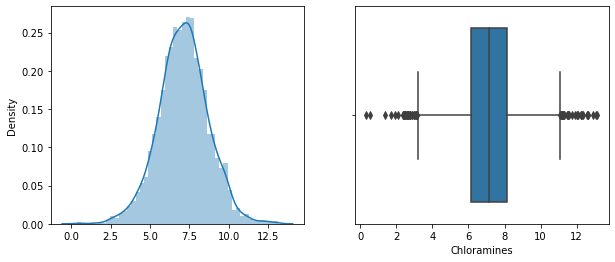

In [17]:
# Chloramines Column
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Chloramines'], kde = True, ax = axes[0])
sns.boxplot(x = data['Chloramines'], ax = axes[1])

As per above plots it looks they have outliers in them and required outlier treatment

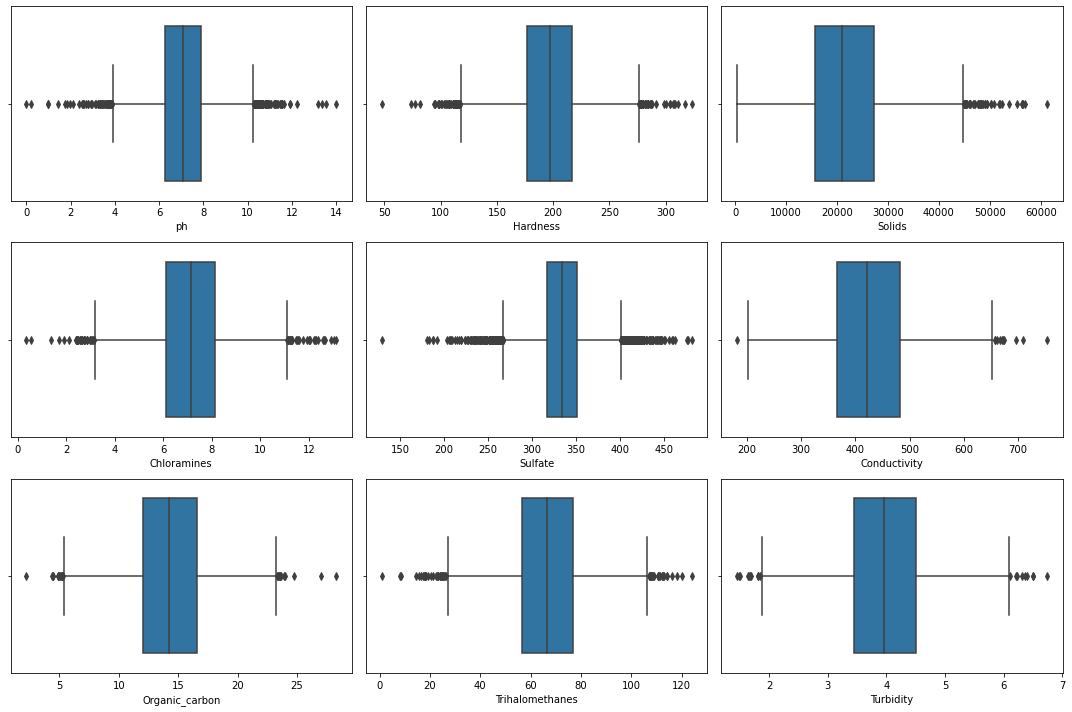

In [18]:
plt.figure(figsize = (15,10), tight_layout = True)
for i, feature in enumerate(data.columns):
    if feature != 'Potability':
        plt.subplot(3,3,i+1)
        sns.boxplot(data = data, x =feature)

Z Score Method to find outliers

In [28]:
import scipy.stats as stats

#find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

#only keep rows in dataset with all z-scores less than absolute value of 3 
data_clean = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3128, 10)

In [29]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataset that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape



(2666, 10)

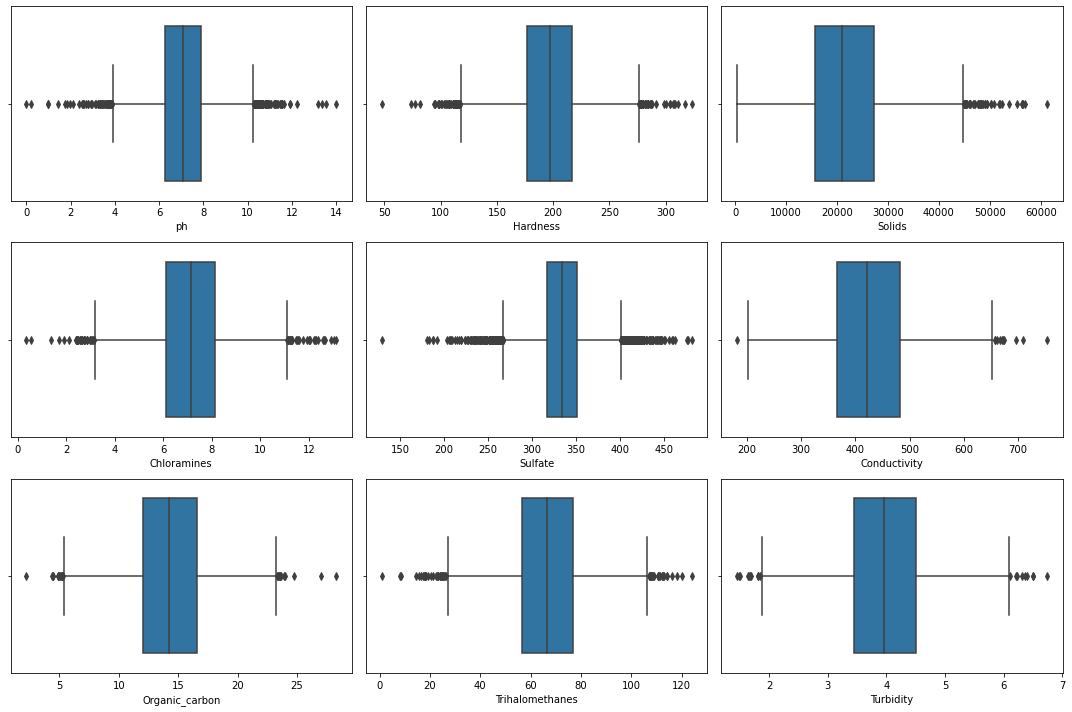

In [30]:
plt.figure(figsize = (15,10), tight_layout = True)
for i, feature in enumerate(data.columns):
    if feature != 'Potability':
        plt.subplot(3,3,i+1)
        sns.boxplot(data = data, x =feature)

We applied Z score test to remove the outliers

### Step 3: Split the Data into Train, Test and Model Building

In [31]:
x_n= (data - np.min(data))/(np.max(data)- np.min(data))
X = data.drop('Potability' , axis=1)
y = data['Potability']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


### Model 1: Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Split the Ratio into Training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 442)

In [34]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [35]:
LogisticRegression(max_iter=3000)

LogisticRegression(max_iter=3000)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       608
           1       0.00      0.00      0.00       375

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.62      0.47       983



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 2: Support Vector Machine

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=1)
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(X_train,y_train)
print("Accuracy of SVM:", svm.score(X_test,y_test))

Accuracy of SVM: 0.5685975609756098


### Model 3: RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=25, random_state=42)
rf.fit(X_train,y_train)
print("Accuracy of RandomForestClassifier:",rf.score(X_test,y_test))

Accuracy of RandomForestClassifier: 0.6417682926829268


### Model 4: Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy of DecisionTreeClassifier: ", dt.score(X_test,y_test))

Accuracy of DecisionTreeClassifier:  0.6067073170731707


### Model 5: KNN - K Nearest Neighbours

In [48]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
X = data.drop('Potability' , axis=1)
y = data['Potability']

In [49]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.5457317073170732


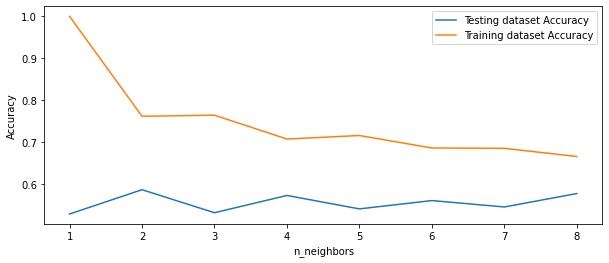

In [51]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Model 6: Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X,y)
print("Accuracy of Naive_Bayes classification: ", nb.score(X,y))

Accuracy of Naive_Bayes classification:  0.6297313797313797


### Confusion Matrix

In [55]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [56]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=9 with svd_solver='full'

In [57]:
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large'

In [58]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.67



In [59]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

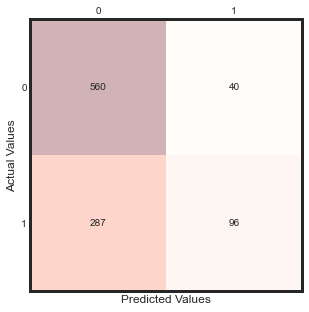

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       600
           1       0.71      0.25      0.37       383

    accuracy                           0.67       983
   macro avg       0.68      0.59      0.57       983
weighted avg       0.68      0.67      0.62       983



In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

### Models Summary

Support Vector Machine - 56.85%, Logistic Regression - 62%, K Nearest Neighbours - 54.57%, Naive Bayes - 62.97%, Decision Tree - 60.67%, Random Forest - 64.17 %

### Conlsusion : Random Forest Classification provided high accuracy from all the models